In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# With this little dataset we can determine the salary according to an specific position

In [2]:
data = pd.read_csv('Position_Salaries.csv')

In [21]:
#setting the data, I don't need the position name since I have the level

X = data.iloc[:, 1:2].values # it's important to build a matrix and not a vector 
y = data.iloc[:, 2].values

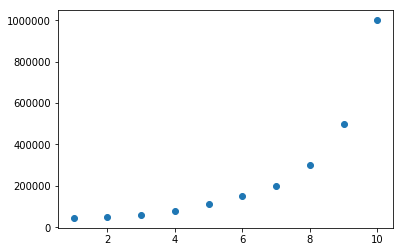

In [22]:
# Here I check the type of relation we have in the dataset

plt.scatter(X, y)

# it seems we have a polynomial regression type, according to the exponential curve of the line

### because the dataset is very small, I have to use all the rows for the training only. Let's start first with simple linear regression


In [23]:
linear_model = LinearRegression()

In [24]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print("Root mean square error of simple linear regression is: " ,np.sqrt(mean_squared_error(X, y)))

Root mean square error of simple linear regression is:  378032.30158083054


## Time for Polynomial regression

In [62]:
poly_regression = PolynomialFeatures(degree=4)

In [63]:
# we need to transform the features to their respective power

X_poly = poly_regression.fit_transform(X)

### we obtain 3 new columns: the constant b0 (first column), the original value (column 2), the value to its respective power (calumn 3)

In [59]:
poly_model = LinearRegression()

In [64]:
poly_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5,1,'Checking simple linear regression, (line does not fit well)')

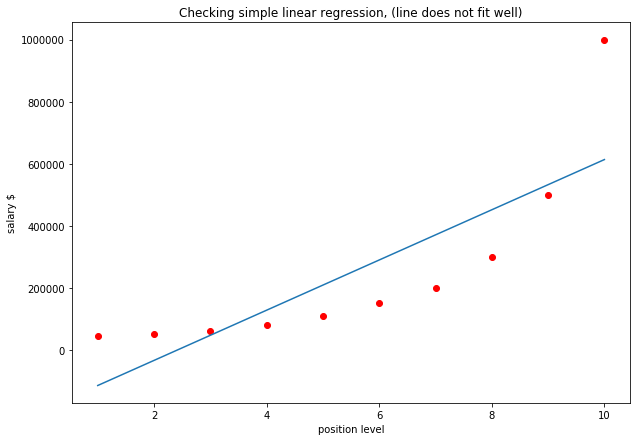

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color="red")
plt.plot(X, linear_model.predict(X))
plt.xlabel("position level")
plt.ylabel("salary $")
plt.title("Checking simple linear regression, (line does not fit well)")

Text(0.5,1,'Checking polynomial regression, (Much better)')

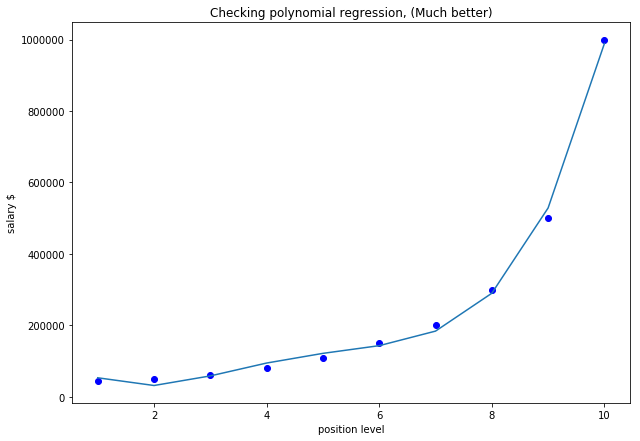

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color="blue")
plt.plot(X, poly_model.predict(X_poly))
plt.xlabel("position level")
plt.ylabel("salary $")
plt.title("Checking polynomial regression, (Much better)")

### predicting a salary with linear and polynomial regression

In [83]:
# Specifying the level of a worker

salary = np.array(6.5)
salary = salary.reshape(-1, 1)

print("salary predicted with linear model: " ,linear_model.predict(salary))

salary predicted with linear model:  [330378.78787879]


In [86]:
print("Salary predicted with polynomial regression: ", poly_model.predict(poly_regression.fit_transform(salary)))

Salary predicted with polynomial regression:  [158862.4526516]


In [96]:
predictions = pd.DataFrame(np.c_[linear_model.predict(salary), poly_model.predict(poly_regression.fit_transform(salary))], columns=["Linear model", "polynomial model"])

In [97]:
predictions

,Linear model,polynomial model
0,330378.787879,158862.452652
